# Spaceship Titanic

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv(r"C:\Users\Divyanshu Dubey\Desktop\Kaggle\train.csv")
df_test=pd.read_csv('test.csv')

In [3]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [5]:
df.isnull().sum()/df.shape[0]*100

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [8]:
df['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [9]:
df=df.drop(columns='Name')

In [10]:
type(df['VIP'].unique()[0])

bool

In [11]:
df['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [12]:
columns_to_be_0 = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
mask = df[columns_to_be_0].eq(0).all(axis=1)
df.loc[mask, 'CryoSleep'] = df.loc[mask, 'CryoSleep'].fillna(True)
df_copy=df.copy()
for var_class in df['Transported'].unique():
    df_copy.update(df[df.loc[:,'Transported'] == var_class]["CryoSleep"].replace(np.nan,df[df.loc[:,'Transported'] == var_class]["CryoSleep"].mode()[0]))
df['CryoSleep']=df_copy['CryoSleep']

In [13]:
df['CryoSleep']=df['CryoSleep'].map({True:1,False:0})
df['VIP']=df['VIP'].map({True:1,False:0})

In [14]:
columns_with_0=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','VIP']
df.loc[df['CryoSleep'] == 0, columns_with_0] = df.loc[df['CryoSleep'] == 0, columns_with_0].fillna(0)


# Data Visualisation

In [15]:
df['Group'] = df['PassengerId'].apply(lambda x: x.split('_')[0])
df['Number'] = df['PassengerId'].apply(lambda x: x.split('_')[1])

In [16]:
df.drop(columns=['PassengerId'],inplace=True)

In [17]:
df['Cabin'] = df['Cabin'].where(df['Cabin'].isna(), df['Cabin'].astype(str))
df[['Deck', 'Room_Number', 'Side']] = df['Cabin'].str.split('/', expand=True)
df.drop(columns=['Cabin'], inplace=True)


<Axes: >

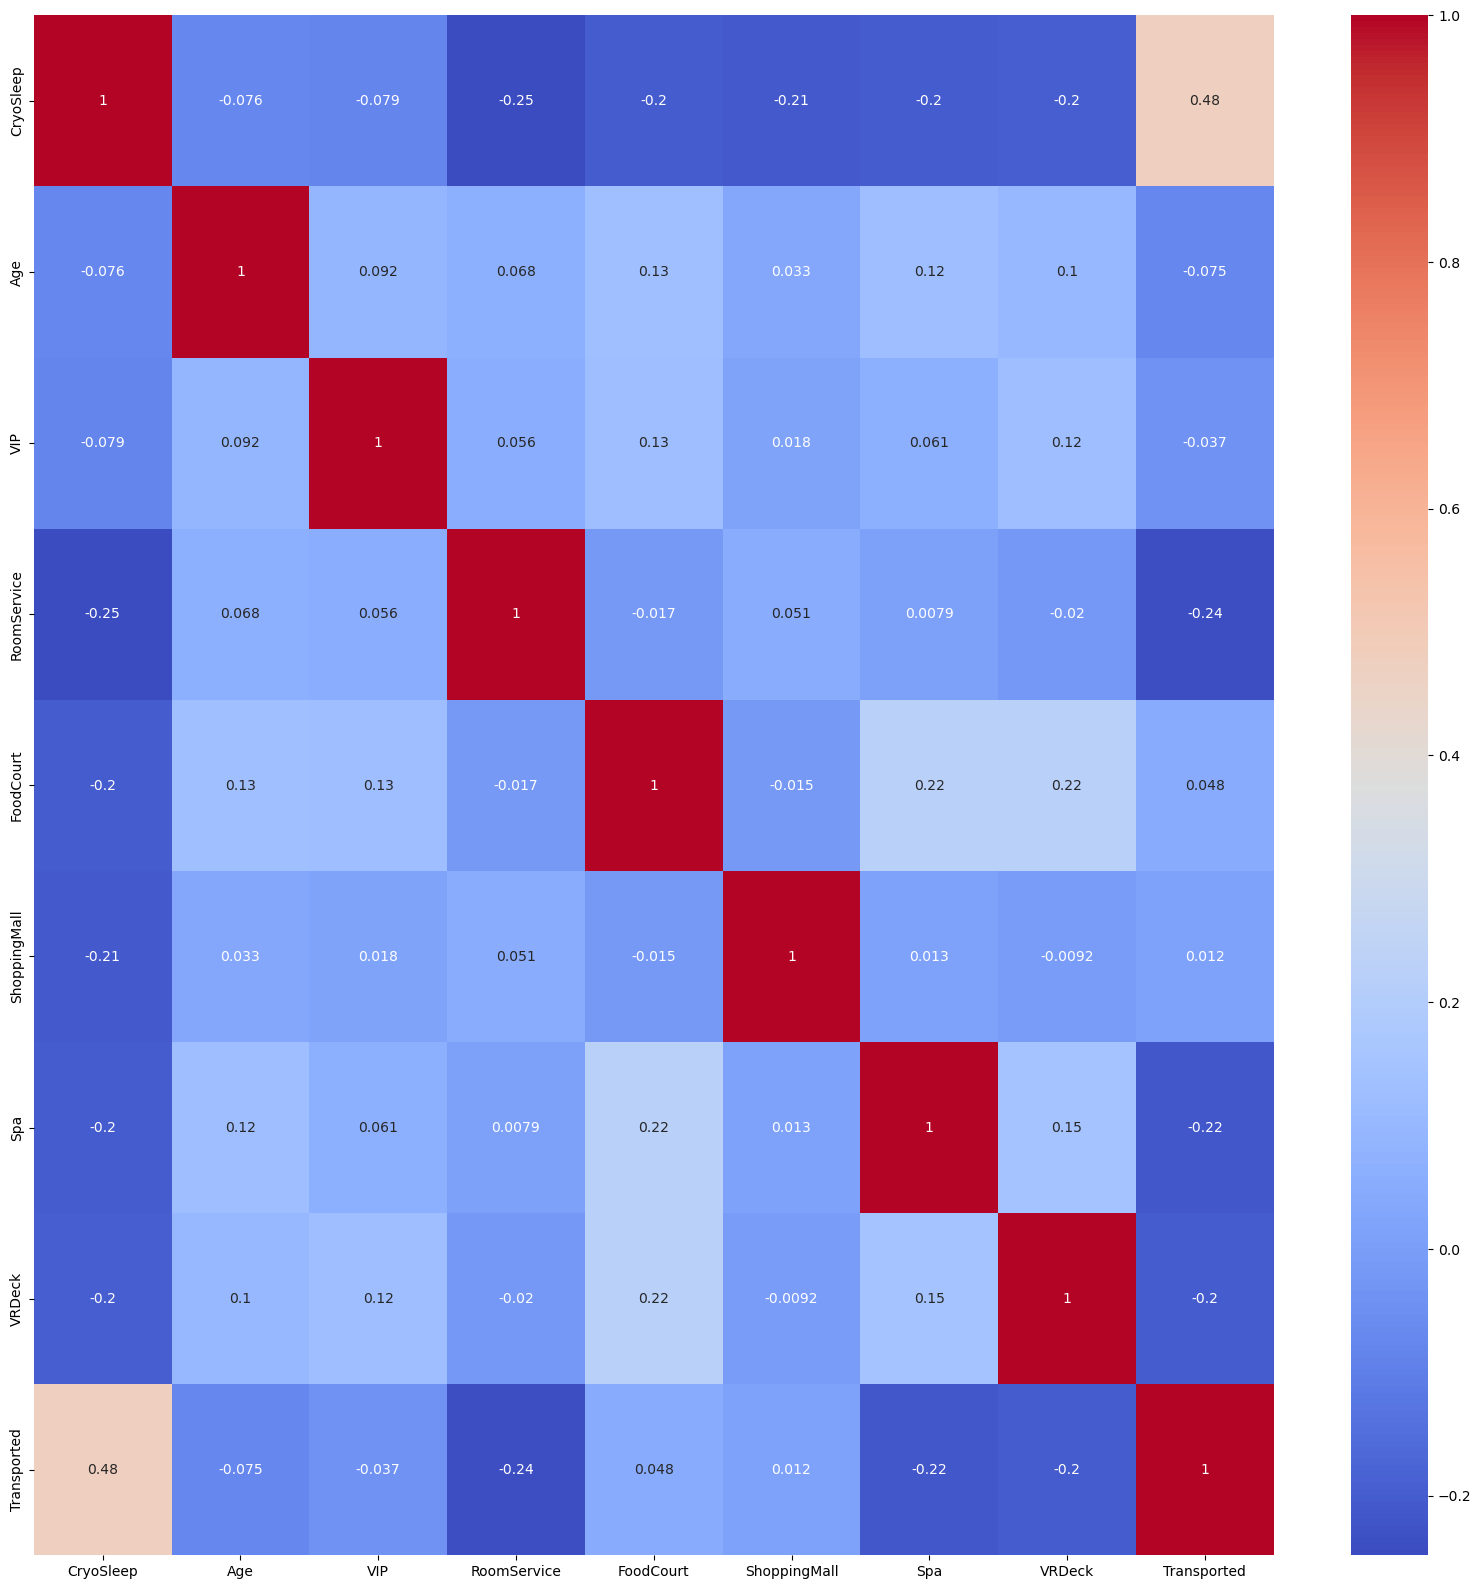

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

<Axes: xlabel='HomePlanet'>

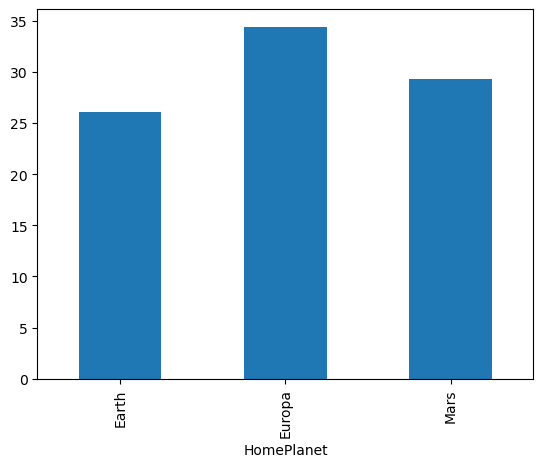

In [19]:
df['Age'].groupby(df['HomePlanet']).mean().plot(kind='bar')

<BarContainer object of 8693 artists>

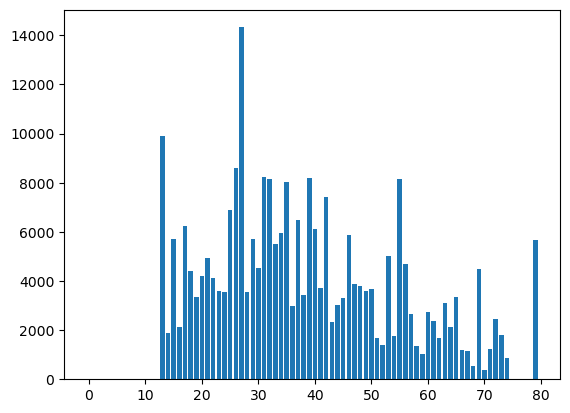

In [20]:
plt.bar(df['Age'],df['RoomService'])

In [21]:
df['HomePlanet'].groupby(df['Destination']).unique()

Destination
55 Cancri e      [Europa, Mars, Earth, nan]
PSO J318.5-22    [Earth, Mars, nan, Europa]
TRAPPIST-1e      [Europa, Earth, Mars, nan]
Name: HomePlanet, dtype: object

<BarContainer object of 9 artists>

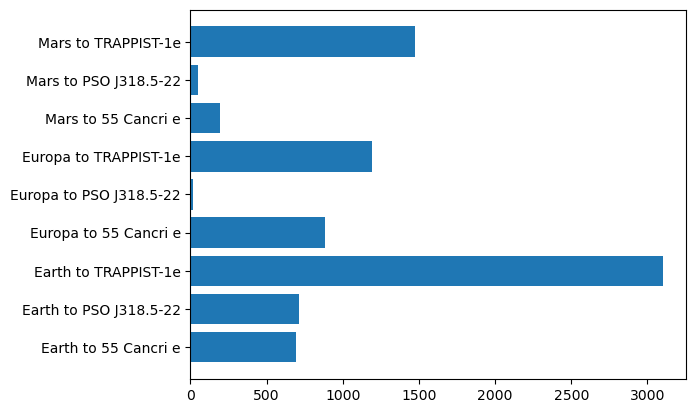

In [22]:
df_counts = df.groupby(['HomePlanet', 'Destination']).size().reset_index(name='Counts')
plt.barh(df_counts['HomePlanet'] + ' to ' + df_counts['Destination'], df_counts['Counts'])

In [23]:
planet_mapping = {
    'TRAPPIST-1e': ['Europa', 'Earth', 'Mars'],
    '55 Cancri e': ['Earth', 'Europa'],
    'PSO J318.5-22': ['Earth']
}

for destination, planets in planet_mapping.items():
    mask = (df['Destination'] == destination) & df['HomePlanet'].isna()
    df.loc[mask, 'HomePlanet'] = np.random.choice(planets, size=mask.sum())

In [24]:
df['Destination'].fillna('TRAPPIST-1e',inplace=True)

In [25]:
len(df['Group'].unique())

6217

In [26]:
for var_class in df['HomePlanet'].unique():
    df_copy.update(df[df.loc[:,'HomePlanet'] == var_class]["Age"].replace(np.nan,df[df.loc[:,'HomePlanet'] == var_class]["Age"].mean()))
df['Age']=df_copy['Age']

In [27]:
from sklearn.impute import SimpleImputer

columns_to_impute = ['Room_Number', 'Age', 'RoomService', 'FoodCourt','ShoppingMall','Spa','VRDeck']
imputer = SimpleImputer(strategy='mean')
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])
imputer_mode=SimpleImputer(strategy='most_frequent')
categorical_features = ['HomePlanet','CryoSleep','Destination','VIP','Deck', 'Side']
df[categorical_features]=imputer_mode.fit_transform(df[categorical_features])


In [28]:
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# columns_to_scale = ['Room_Number', 'Age', 'RoomService', 'FoodCourt','ShoppingMall','Spa','VRDeck']
# scaler = StandardScaler()
# df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
# columns_to_encode = ['HomePlanet','CryoSleep','Destination','VIP','Deck', 'Side']
# df=pd.concat([df,pd.get_dummies(df[columns_to_encode])],axis=1)
# df = df.drop(columns_to_encode, axis=1)

In [29]:
df['Transported']=df['Transported'].astype(int)

In [30]:
X_train = df.drop(columns='Transported')
y_train= df['Transported']

In [31]:
X_train.shape

(8693, 15)

In [32]:
from sklearn.ensemble import  BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [33]:
# linear=LinearRegression()
# linear.fit(X_train,y_train)

In [34]:
df_test=pd.read_csv('test.csv')

In [35]:
df_test=df_test.drop(columns='Name')

In [36]:
columns_to_be_0 = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
mask = df_test[columns_to_be_0].eq(0).all(axis=1)
df_test.loc[mask, 'CryoSleep'] = df_test.loc[mask, 'CryoSleep'].fillna(True)

In [37]:
df_test['CryoSleep']=df_test['CryoSleep'].map({True:1,False:0})
df_test['VIP']=df_test['VIP'].map({True:1,False:0})

In [38]:
columns_with_0=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','VIP']
df_test.loc[df_test['CryoSleep'] == 0, columns_with_0] = df_test.loc[df_test['CryoSleep'] == 0, columns_with_0].fillna(0)


In [39]:
df_test['Group'] = df_test['PassengerId'].apply(lambda x: x.split('_')[0])
df_test['Number'] =df_test['PassengerId'].apply(lambda x: x.split('_')[1])
df_test.drop(columns=['PassengerId'],inplace=True)
df_test['Cabin'] = df_test['Cabin'].where(df_test['Cabin'].isna(), df_test['Cabin'].astype(str))
df_test[['Deck', 'Room_Number', 'Side']] = df_test['Cabin'].str.split('/', expand=True)
df_test.drop(columns=['Cabin'], inplace=True)


In [40]:
planet_mapping = {
    'TRAPPIST-1e': ['Europa', 'Earth', 'Mars'],
    '55 Cancri e': ['Earth', 'Europa'],
    'PSO J318.5-22': ['Earth']
}

for destination, planets in planet_mapping.items():
    mask = (df_test['Destination'] == destination) & df_test['HomePlanet'].isna()
    df_test.loc[mask, 'HomePlanet'] = np.random.choice(planets, size=mask.sum())

In [41]:
df_test['Destination'].fillna('TRAPPIST-1e',inplace=True)

In [42]:
df_copy=df_test.copy()
for var_class in df_test['HomePlanet'].unique():
    df_copy.update(df_test[df_test.loc[:,'HomePlanet'] == var_class]["Age"].replace(np.nan,df_test[df_test.loc[:,'HomePlanet'] == var_class]["Age"].mean()))
df_test['Age']=df_copy['Age']

In [43]:
from sklearn.impute import SimpleImputer

columns_to_impute = ['Room_Number', 'Age', 'RoomService', 'FoodCourt','ShoppingMall','Spa','VRDeck']
imputer = SimpleImputer(strategy='mean')
df_test[columns_to_impute] = imputer.fit_transform(df_test[columns_to_impute])
imputer_mode=SimpleImputer(strategy='most_frequent')
categorical_features = ['HomePlanet','CryoSleep','Destination','VIP','Deck', 'Side']
df_test[categorical_features]=imputer_mode.fit_transform(df_test[categorical_features])


In [44]:
df_test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,Number,Deck,Room_Number,Side
0,Earth,1.0,TRAPPIST-1e,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0013,01,G,3.0,S
1,Earth,0.0,TRAPPIST-1e,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,0018,01,F,4.0,S
2,Europa,1.0,55 Cancri e,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0019,01,C,0.0,S
3,Europa,0.0,TRAPPIST-1e,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,0021,01,C,1.0,S
4,Earth,0.0,TRAPPIST-1e,20.0,0.0,10.0,0.0,635.0,0.0,0.0,0023,01,F,5.0,S


In [45]:
df_test.rename(columns={'CryoSleep_0.0':'CryoSleep_0','CryoSleep_1.0':'CryoSleep_1'},inplace=True)

In [46]:
X_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,Number,Deck,Room_Number,Side
0,Europa,0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0001,01,B,0.0,P
1,Earth,0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,0002,01,F,0.0,S
2,Europa,0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0003,01,A,0.0,S
3,Europa,0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0003,02,A,0.0,S
4,Earth,0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,0004,01,F,1.0,S


In [47]:
X_test=df_test

In [48]:
df_edit=pd.concat([X_train,X_test],ignore_index=True)
df_edit['notRoaming']=df_edit[['Spa','VRDeck','RoomService','VIP']].eq(0).all(axis=1).astype(int)
df_edit['roaming']=df_edit[['FoodCourt','ShoppingMall']].eq(0).all(axis=1).astype(int)
df_edit['Old']=(df_edit['Age']>50).astype(int)
df_edit['Home_to_Destination']=df_edit['HomePlanet'] + ' to ' + df_edit['Destination']

In [49]:
# predictions

In [51]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
columns_to_scale = ['Room_Number', 'Age', 'RoomService', 'FoodCourt','ShoppingMall','Spa','VRDeck']
scaler = StandardScaler()
df_edit[columns_to_scale] = scaler.fit_transform(df_edit[columns_to_scale])
columns_to_encode = ['notRoaming','roaming','Home_to_Destination','Old','HomePlanet','CryoSleep','Destination','VIP','Deck', 'Side']
df_edit=pd.concat([df_edit,pd.get_dummies(df_edit[columns_to_encode])],axis=1)
df_edit= df_edit.drop(columns_to_encode, axis=1)

In [52]:
df_edit.head(20)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,Number,Room_Number,Home_to_Destination_Earth to 55 Cancri e,Home_to_Destination_Earth to PSO J318.5-22,Home_to_Destination_Earth to TRAPPIST-1e,Home_to_Destination_Europa to 55 Cancri e,Home_to_Destination_Europa to PSO J318.5-22,Home_to_Destination_Europa to TRAPPIST-1e,Home_to_Destination_Mars to 55 Cancri e,Home_to_Destination_Mars to PSO J318.5-22,Home_to_Destination_Mars to TRAPPIST-1e,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_0,CryoSleep_1,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_0.0,VIP_1.0,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,0.717650,-0.342951,-0.284327,-0.295570,-0.272139,-0.259101,0001,01,-1.190712,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0
1,-0.335381,-0.173028,-0.278585,-0.252752,0.218763,-0.221440,0002,01,-1.190712,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1
2,2.051489,-0.275917,1.997093,-0.295570,5.732247,-0.217161,0003,01,-1.190712,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1
3,0.296438,-0.342951,0.534203,0.339847,2.704570,-0.093907,0003,02,-1.190712,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1
4,-0.896997,0.129404,-0.239668,-0.036950,0.233070,-0.257390,0004,01,-1.188740,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1
5,1.068660,-0.342951,0.023818,-0.295570,-0.011934,-0.259101,0005,01,-1.190712,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0
6,-0.194977,-0.277476,0.697526,-0.290432,-0.272139,-0.259101,0006,01,-1.186767,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1
7,-0.054573,-0.342951,-0.284327,-0.295570,-0.272139,-0.001827,0006,02,-1.190712,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1
8,0.436842,-0.342951,0.216488,-0.266454,-0.078997,-0.259101,0007,01,-1.184794,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1
9,-1.037401,-0.342951,-0.284327,-0.295570,-0.272139,-0.259101,0008,01,-1.188740,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0


In [53]:
X_train=df_edit.iloc[:8693, :]

In [54]:
X_train.shape

(8693, 38)

In [55]:
X_test=df_edit.iloc[8693: , :]

In [56]:
X_test.shape

(4277, 38)

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Define the models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('SVM', SVC())
]

# Initialize a dictionary to hold predictions
predictions = {}

# Loop through the models
for i, (name, model) in enumerate(models):
    # Fit the model and calculate cross-validation score
    cv_score = cross_val_score(model, X_train, y_train, cv=5).mean()
    print(f"{name} CV Score: {cv_score}")

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Store the predictions
    predictions[f"prediction_{i+1}"] = model.predict(X_test)

Logistic Regression CV Score: 0.7816624106416727
Random Forest CV Score: 0.775570328303967
Gradient Boosting CV Score: 0.7292123232602629
SVM CV Score: 0.499252443933295


In [58]:
for i, model_name in enumerate(predictions.keys()):
    data = pd.DataFrame()
    data['PassengerId'] = df_test['Group'].astype(str) + "_" + df_test['Number'].astype(str)
    data['Transported'] = predictions[model_name].astype(bool)
    data.to_csv(f'output{i}.csv', index=False)
